In [1]:
# GPU使用の有無確認
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 16046737563841033788
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14801698816
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 16476811034069097651
 physical_device_desc: "device: 0, name: Quadro RTX 5000, pci bus id: 0000:02:00.0, compute capability: 7.5"
 xla_global_id: 416903419]

In [2]:
import tensorflow

In [3]:
(x_train, y_train), (x_test, y_test) = tensorflow.keras.datasets.mnist.load_data()

In [4]:
# データ数を確認
print(f'train: {len(x_train)}')
print(f'test: {len(x_test)}')

train: 60000
test: 10000


img type: <class 'numpy.ndarray'>
img shape: (28, 28)
img max: 255, min: 0
label: 5


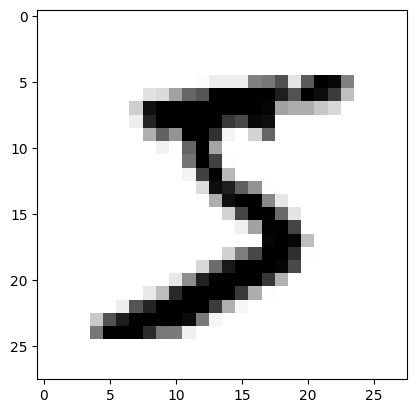

In [5]:
# 最初のデータを確認
img, label = x_train[0], y_train[0]

print(f'img type: {type(img)}')
print(f'img shape: {img.shape}') # CHW: Channel Height Width
print(f'img max: {img.max()}, min: {img.min()}') # normalized with 0, 1
print(f'label: {label}')
import matplotlib.pyplot as plt
plt.imshow(img, cmap='gray_r')

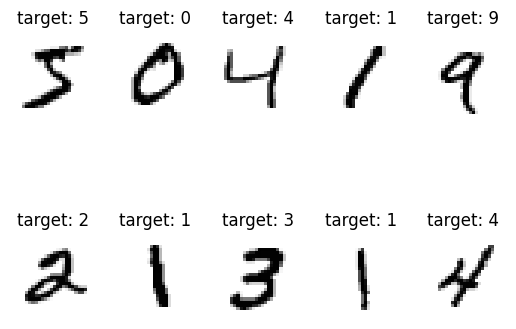

In [6]:
# データの中身の確認
import matplotlib.pyplot as plt  # 可視化のためのモジュール

images_and_labels = list(zip(x_train, y_train))
for index, (image, label) in enumerate(images_and_labels[:10]):
    plt.subplot(2, 5, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('target: %i' % label)
plt.show()

In [7]:
# データの整形
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [8]:
# モデルの作成
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import RMSprop

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [9]:
y_train = tensorflow.keras.utils.to_categorical(y_train, 10)
y_test = tensorflow.keras.utils.to_categorical(y_test, 10)

In [10]:
from tensorflow.keras.callbacks import EarlyStopping
import time
start_time = time.time()  # スタート時間計測

history = model.fit(x_train, y_train,
                    # batch_size=128,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_test, y_test),
                    callbacks=[EarlyStopping(patience=1, verbose=1)])

score = model.evaluate(x_test, y_test, verbose=0)
print('loss:', score[0])
print('accuracy:', score[1])

end_time = time.time() - start_time  # 終了時間を計測
print("学習時間：", str(round(end_time, 3)), "秒でした。")

Epoch 1/10
1875/1875 [==============================] - 22s 9ms/step - loss: 0.1771 - accuracy: 0.9469 - val_loss: 0.0517 - val_accuracy: 0.9838
Epoch 2/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0856 - accuracy: 0.9754 - val_loss: 0.0505 - val_accuracy: 0.9842
Epoch 3/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0826 - accuracy: 0.9772 - val_loss: 0.0471 - val_accuracy: 0.9851
Epoch 4/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0821 - accuracy: 0.9771 - val_loss: 0.0442 - val_accuracy: 0.9869
Epoch 5/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0856 - accuracy: 0.9771 - val_loss: 0.0452 - val_accuracy: 0.9857
Epoch 5: early stopping
loss: 0.045174822211265564
accuracy: 0.9857000112533569
学習時間： 88.388 秒でした。
